In [ ]:
# Importamos las librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Recorte, extracción y cambio de perspectiva

En esta sección vamos a recortar una de las cartas, extraerla y rotarla para que se vea de frente.

Para eso vamos a:

1. Identificar las cuatros esquinas de la carta en cuestión (Vamos a extraer el rey de picas del frente y rotarlo).
2. Crear una matriz de transformación de cambio perspectiva. Para esto especificaremos los puntos 4 puntos de origen y los 4 puntos de destino y vamos a llamar a `cv2.getPerspectiveTransform(pts1, pts2)` que va a construir la matriz que nos va a servir para realizar esta transformación

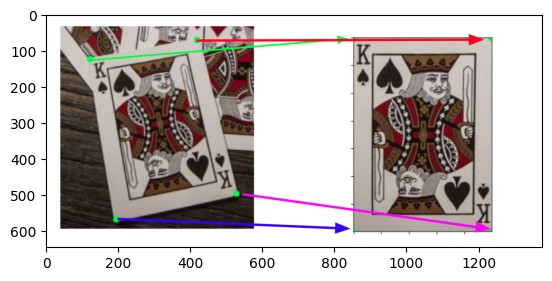

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Clases/IMAGEN/007/TEO/Imagenes/cambio-perspectiva.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

3. Finalmente, vamos a aplicarla con `cv2.wrapPerspective()`, que va a extraer el area delimitada en la imagen original y aplicar la matriz de cambio de perspectiva para generar una imagen única recortada y con una nueva alineación.

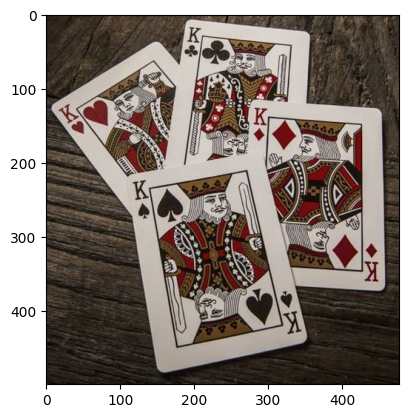

In [ ]:
# Comencemos abriendo la imagen
img = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/Clases/IMAGEN/007/TEO/Imagenes/cards.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [ ]:
img.shape

(500, 477, 3)

Ahora vamos a identificar, a ojo, las coordenadas de las esquinas de la carta que queremos extraer y cambiar de perspectiva:

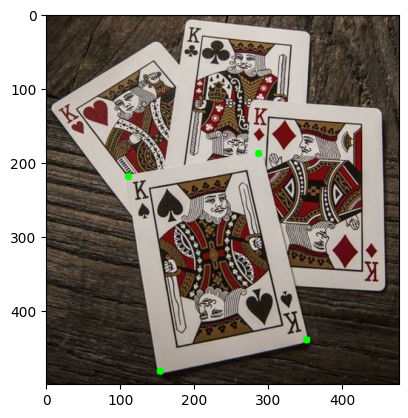

In [ ]:
# Primero coordenada x, despues coordenada y
corners = [(111, 219), # Superior izquierdo
           (287, 188), # Inferior izquierdo
           (154, 482), # Superior derecho
           (352,  440) # Inferior derecho
          ]

for x, y in corners:
    cv2.circle(img, (x,y), radius=0, color=(0, 255, 0), thickness=10)
plt.imshow(img);

Creamos la matriz de cambio de perspectiva. Para eso, especificamos los puntos originales y a donde va a ir cada uno en la imagen final. Debemos decidir el tamaño de la imagen final

In [ ]:
w, h = 250, 350

In [ ]:
pts1 = np.float32(corners)
# Para los puntos de destino, debe preservarse el orden de los puntos originales
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

In [ ]:
# Obtenemos la matriz de cambio de perspectiva
matrix = cv2.getPerspectiveTransform(pts1, pts2)

In [ ]:
# Y la aplicamos con warpPerspective
# El segundo parametro es esta matriz y el tercero debe ser una tupla con especificando (ancho, alto)
img_output = cv2.warpPerspective(img, matrix, (w, h))
plt.imshow(img_output);